In [30]:
import os
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np



In [31]:
path_basins_vörösmarty2010 = 'data/basins/asia_Vörösmarty2010_6min.gpkg'  
path_basins_lehner2013 = 'data/basins/asia_Lehner2013_levels/hybas_as_lev03_v1c.gpkg'  ### HydroSHEDS dataset
path_basins_lehner2013_l4 = 'data/basins/asia_Lehner2013_levels/hybas_as_lev04_v1c.gpkg'  ### HydroSHEDS dataset
path_basins_lehner2013_l5 = 'data/basins/asia_Lehner2013_levels/hybas_as_lev05_v1c.gpkg'  ### HydroSHEDS dataset
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_lakes = 'data/lakes/HydroLakes_v10_hma.gpkg'

In [32]:
hma_gtng = gpd.read_file(path_hma_gtng)
hma_lakes = gpd.read_file(path_lakes)
hma_lakes_reproj = hma_lakes.to_crs('EPSG:9822')
hma_basins_vörösmarty2010 = gpd.read_file(path_basins_vörösmarty2010)
hma_basins_lehner2013 = gpd.read_file(path_basins_lehner2013)
hma_basins_lehner2013_l4 = gpd.read_file(path_basins_lehner2013_l4)
hma_basins_lehner2013_l5 = gpd.read_file(path_basins_lehner2013_l5)
hma_basins_lehner2013.head()


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,4030000010,0,4030000010,4030000010,0.0,0.0,105274.5,105274.5,421,0,1,0,1,"MULTIPOLYGON (((138.20694 54.69583, 138.20201 ..."
1,4030000880,0,4030000880,4030000880,0.0,0.0,2238972.5,2238972.5,422,0,0,1,2,"MULTIPOLYGON (((115.33333 43.95000, 115.33333 ..."
2,4030000890,0,4030000890,4030000890,0.0,0.0,161519.5,161519.5,423,0,1,0,3,"MULTIPOLYGON (((140.85694 53.06250, 140.85201 ..."
3,4030003020,0,4030003020,4030003020,0.0,0.0,523780.2,523780.2,424,0,1,0,4,"MULTIPOLYGON (((126.23611 37.75000, 126.22704 ..."
4,4030006940,0,4030006940,4030006940,0.0,0.0,342457.3,342457.3,431,0,1,0,5,"MULTIPOLYGON (((118.51111 38.91667, 118.50499 ..."


Text(0.5, 1.0, 'hma basins')

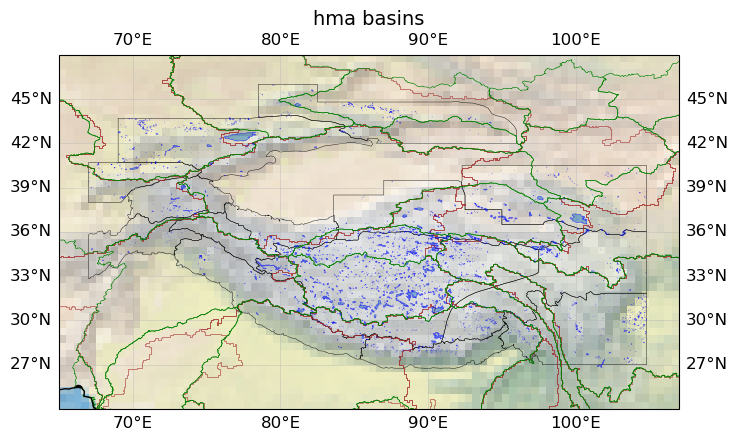

In [171]:
# warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.set_extent([50.0, 125.0, 8.0, 47.0])
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linestyle='-', linewidth=0.3)
hma_basins_vörösmarty2010.plot(ax=ax, edgecolor='brown', facecolor='none', linestyle='-', linewidth=0.4)
hma_basins_lehner2013.plot(ax=ax, edgecolor='green', facecolor='none', linestyle='-', linewidth=0.4)
hma_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5, alpha=0.5)
ax.stock_img(); ax.coastlines()
ax.set_title('hma basins', fontsize=14)
# plt.savefig('figures/hma_hydro_basins.png', bbox_inches='tight', dpi=100)


Text(0.5, 1.0, 'hma lehner2013 basins')

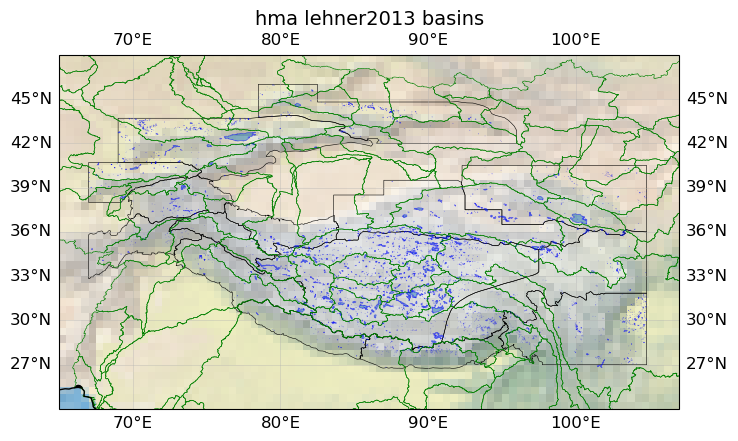

In [163]:
# warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.set_extent([50.0, 125.0, 8.0, 47.0])
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none',  linestyle='-', linewidth=0.4)
# hma_basins_lehner2013_l5.plot(ax=ax, edgecolor='orange', facecolor='none', linestyle='-', linewidth=0.5)
hma_basins_lehner2013_l4.plot(ax=ax, edgecolor='green', facecolor='none', linestyle='-', linewidth=0.4)
hma_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5, alpha=0.5)
ax.stock_img(); ax.coastlines()
ax.set_title('hma lehner2013 basins', fontsize=14)
# plt.savefig('figures/hma_hydro_basins.png', bbox_inches='tight', dpi=100)


#### Statistic of the lake area of each basin.
1. For the level-4 basin.


In [35]:
### statistic of the reserviors area in each sub hma region.
hma_basins_lehner2013_l4['area_lakes'] = None
for i in range(hma_basins_lehner2013_l4.shape[0]):
    basin = hma_basins_lehner2013_l4['geometry'][i]
    ids = np.where(basin.contains(hma_lakes['geometry'].centroid))[0]
    area_basin = hma_lakes_reproj.loc[ids].area.sum()/1000000
    hma_basins_lehner2013_l4['area_lakes'][i] = area_basin


In [39]:
ids_l4 = np.where(hma_basins_lehner2013_l4['area_lakes']>100)[0]
hma_basins_lehner2013_l4_sel = hma_basins_lehner2013_l4.loc[ids_l4]
hma_basins_lehner2013_l4_sel.shape


(25, 15)

Text(0.5, 1.0, 'hma level-4 basins')

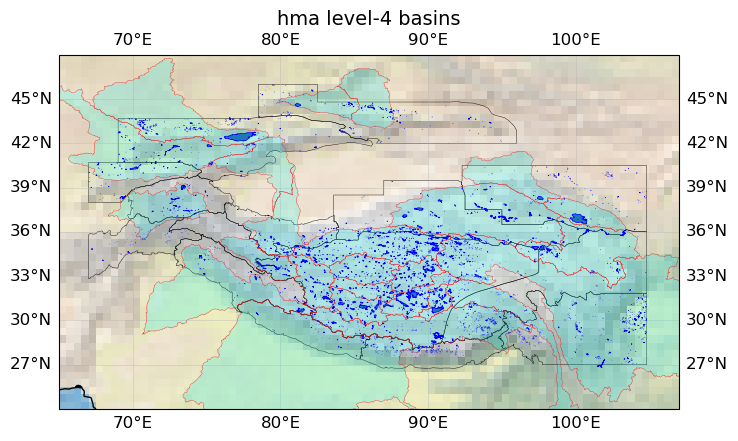

In [97]:
# warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.set_extent([50.0, 125.0, 8.0, 47.0])
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linestyle='-', linewidth=0.3)
hma_basins_lehner2013_l4_sel.plot(ax=ax, edgecolor='green', facecolor='cyan', \
                                            alpha=0.2, linestyle='-', linewidth=0)
hma_basins_lehner2013_l4_sel.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=0.2)  ## draw boundries
hma_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5)
ax.stock_img(); ax.coastlines()
ax.set_title('hma level-4 basins', fontsize=14)



2. For the level-5 basin.

In [47]:
### statistic of the reserviors area in each sub hma region.
hma_basins_lehner2013_l5['area_lakes'] = None
for i in range(hma_basins_lehner2013_l5.shape[0]):
    basin = hma_basins_lehner2013_l5['geometry'][i]
    ids = np.where(basin.contains(hma_lakes['geometry'].centroid))[0]
    area_basin = hma_lakes_reproj.loc[ids].area.sum()/1000000
    hma_basins_lehner2013_l5['area_lakes'][i] = area_basin



In [152]:
ids_l5 = np.where(hma_basins_lehner2013_l5['area_lakes']>200)[0]
hma_basins_lehner2013_l5_sel = hma_basins_lehner2013_l5.loc[ids_l5]
hma_basins_lehner2013_l5_sel.shape


(38, 15)

Text(0.5, 1.0, 'hma level-5 basins')

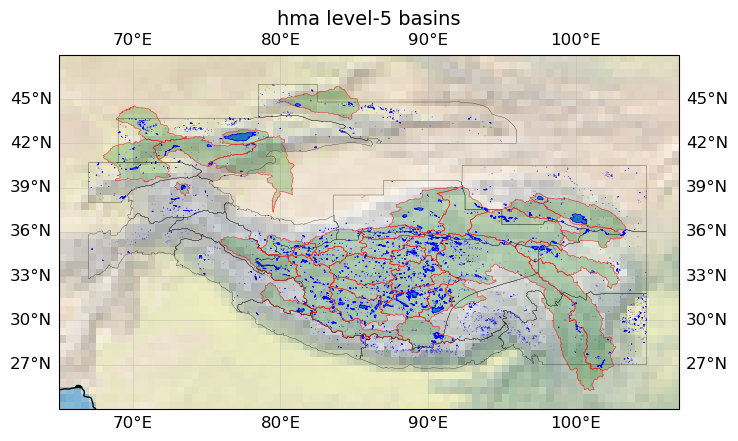

In [153]:
# warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linestyle='-', linewidth=0.2)
hma_basins_lehner2013_l5_sel.plot(ax=ax, edgecolor='red', \
                                  facecolor='green', alpha=0.2, linestyle='-', linewidth=0.5)
hma_basins_lehner2013_l5_sel.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=0.2)  ## draw boundries
hma_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5)
ax.stock_img(); ax.coastlines()
ax.set_title('hma level-5 basins', fontsize=14)
